# ***1. Data Loading and Initial Analysis***

In [1]:
from google.colab import files
files.upload()

Saving train.csv to train.csv


{'train.csv': b'id,label,tweet\n1,0, @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run\n2,0,@user @user thanks for #lyft credit i can\'t use cause they don\'t offer wheelchair vans in pdx.    #disapointed #getthanked\n3,0,  bihday your majesty\n4,0,#model   i love u take with u all the time in ur\xc3\xb0\xc2\x9f\xc2\x93\xc2\xb1!!! \xc3\xb0\xc2\x9f\xc2\x98\xc2\x99\xc3\xb0\xc2\x9f\xc2\x98\xc2\x8e\xc3\xb0\xc2\x9f\xc2\x91\xc2\x84\xc3\xb0\xc2\x9f\xc2\x91\xc2\x85\xc3\xb0\xc2\x9f\xc2\x92\xc2\xa6\xc3\xb0\xc2\x9f\xc2\x92\xc2\xa6\xc3\xb0\xc2\x9f\xc2\x92\xc2\xa6  \n5,0, factsguide: society now    #motivation\n6,0,[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  \n7,0, @user camping tomorrow @user @user @user @user @user @user @user danny\xc3\xa2\xc2\x80\xc2\xa6\n8,0,the next school year is the year for exams.\xc3\xb0\xc2\x9f\xc2\x98\xc2\xaf can\'t think about that \xc3\xb0\xc2\x9

In [2]:
import pandas as pd
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler

In [3]:
data = pd.read_csv('train.csv')

In [4]:
print(data.head())

   id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation


In [8]:
print(data.columns)

Index(['id', 'label', 'tweet'], dtype='object')


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate tweet lengths
tweet_lengths = X_train['cleaned_text'].apply(lambda x: len(x.split()))

# Plot distribution of tweet lengths
plt.figure(figsize=(10, 5))
sns.histplot(tweet_lengths, bins=30, kde=True)
plt.title('Distribution of Tweet Lengths')
plt.xlabel('Tweet Length (words)')
plt.ylabel('Frequency')
plt.show()


In [9]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [10]:
pip install pandas nltk scikit-learn imbalanced-learn

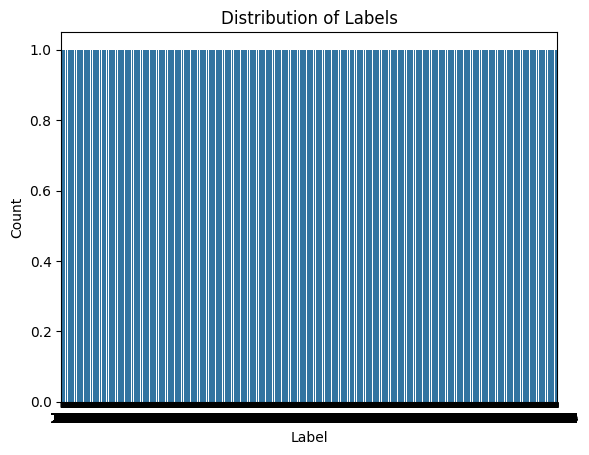

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the distribution of labels
sns.countplot(data['label'])
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


# ***2. Data Preprocessing***

In [11]:
# Data cleaning function
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^A-Za-z0-9\s]', '', text)  # Remove non-alphanumeric characters
    text = text.lower()  # Convert to lowercase
    text = word_tokenize(text)  # Tokenize
    text = [word for word in text if word not in stopwords.words('english')]  # Remove stopwords
    return ' '.join(text)

# Apply the cleaning function to the dataset
data['cleaned_text'] = data['tweet'].apply(clean_text)

# Separate features and target
X = data['cleaned_text']
y = data['label']

# Handle class imbalance using oversampling
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X.to_frame(), y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

print(X_train.head())
print(y_train.head())


                                            cleaned_text
30479  1st time volunteering user absolutely incredib...
58082  user stay course losers never win dinosaurs th...
18521  peppa pig ice cream finger family user ol elsa...
30553  happy fathers day dad abc7chicago fathers day ...
248                                            days till
30479    0
58082    1
18521    0
30553    0
248      0
Name: label, dtype: int64


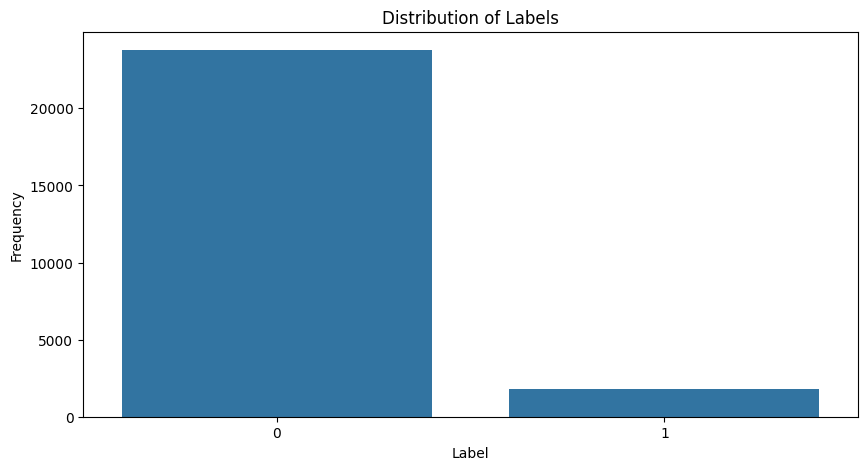

In [51]:
# Plot distribution of labels
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train)
plt.title('Distribution of Labels')
plt.xlabel('Label')
plt.ylabel('Frequency')
plt.show()


In [43]:
# Install necessary libraries
!pip install wordcloud matplotlib




IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

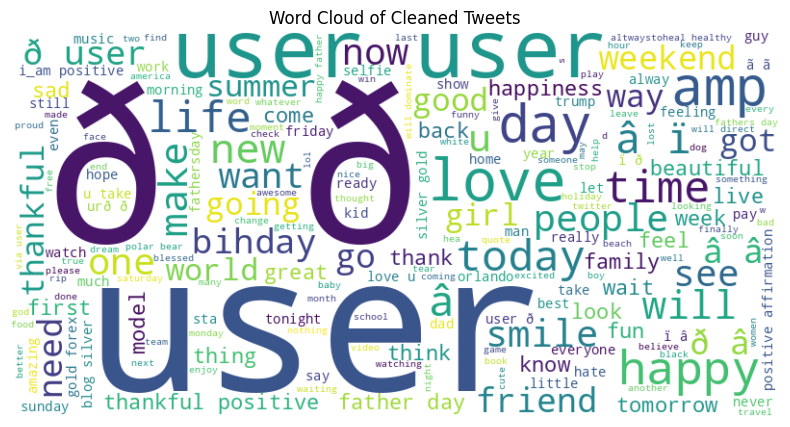

In [44]:
# Import necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Combine all text from the cleaned text data
all_text = ' '.join(X_train) # X_train is a NumPy array, no need to index it with 'cleaned_text'

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Cleaned Tweets')
plt.show()

# ***3. Word Embeddings***

In [12]:
from gensim.models import Word2Vec

# Tokenize the cleaned text
tokenized_text = [word_tokenize(text) for text in X_train['cleaned_text']]

# Train Word2Vec model
word2vec_model = Word2Vec(tokenized_text, vector_size=100, window=5, min_count=1, workers=4)
word2vec_model.save("word2vec.model")

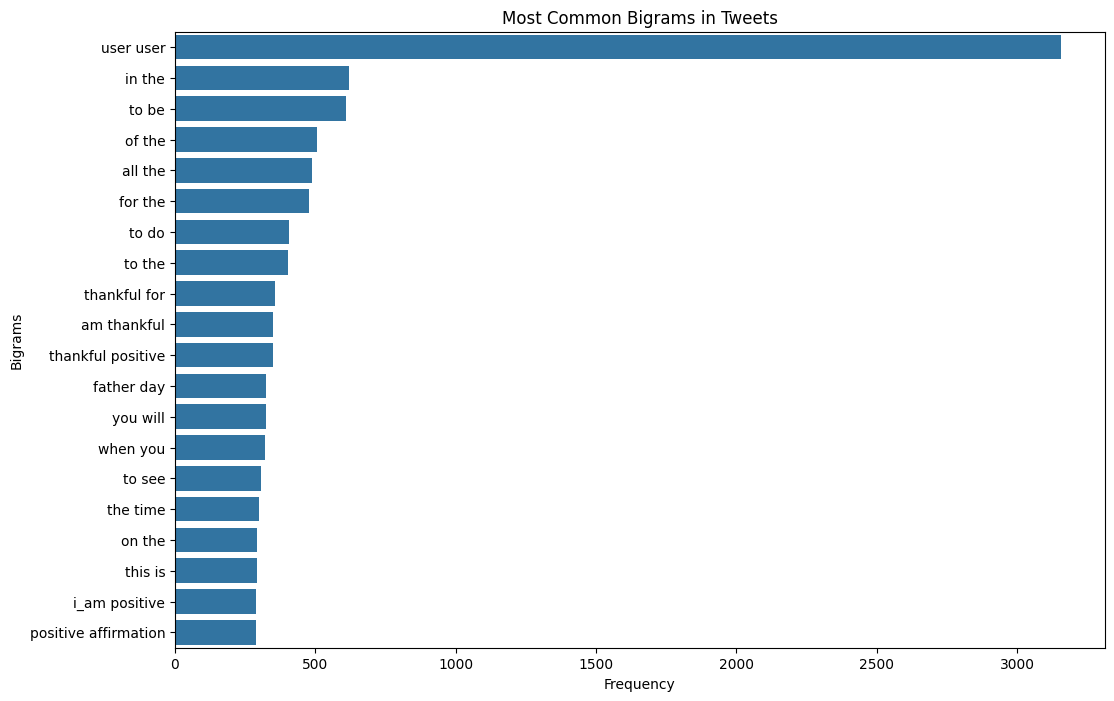

In [56]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import seaborn as sns

# Create a bigram counter
vectorizer = CountVectorizer(ngram_range=(2, 2))

# Assuming 'cleaned_text' is a column in your DataFrame 'X_train' that contains the text data.
# Fit and transform the text data to get the bigram counts
X_train_bigrams = vectorizer.fit_transform(X_train)

# Sum the counts of each bigram
bigram_counts = X_train_bigrams.sum(axis=0).A1

# Get the bigram vocabulary
bigram_vocab = vectorizer.vocabulary_

# Create a list of bigrams and their counts
bigram_freq = [(bigram, bigram_counts[idx]) for bigram, idx in bigram_vocab.items()]

# Sort the bigrams by frequency and select the top 20
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:20]

# Separate the bigrams and their counts for plotting
bigrams, counts = zip(*bigram_freq)

# Plot the most common bigrams
plt.figure(figsize=(12, 8))
sns.barplot(x=list(counts), y=list(bigrams))
plt.title('Most Common Bigrams in Tweets')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


# ***4. Model Architecture for Each Category***
We will define separate models for each category: user engagement and content personalization ("The Good"), privacy concern ("The Bad"), and misinformation and hate speech ("The Evil").

4.1. User Engagement and Content Personalization Model ("The Good")

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score # Import accuracy_score and f1_score

# Initialize TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer to the training data and transform both training and testing data
X_train_vec = vectorizer.fit_transform(X_train['cleaned_text'])
X_test_vec = vectorizer.transform(X_test['cleaned_text'])

# Define and train the RandomForest model using the vectorized data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)  # Use vectorized training data

# Evaluate the model using vectorized testing data
y_pred = rf_model.predict(X_test_vec)  # Use vectorized testing data
print(f'Accuracy: {accuracy_score(y_test, y_pred)}') # Now you can use accuracy_score
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')

Accuracy: 0.9866251682368775
F1 Score: 0.9866212087745219


4.2. Privacy Concern Model ("The Bad")

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train['cleaned_text']) # Fit on the text column of the DataFrame
X_train_seq = tokenizer.texts_to_sequences(X_train['cleaned_text']) # Transform the text column
X_test_seq = tokenizer.texts_to_sequences(X_test['cleaned_text'])
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)


# Define and train the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate the model
score = model.evaluate(X_test_pad, y_test, verbose=0)
print(f'Accuracy: {score[1]}')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


743/743 ━━━━━━━━━━━━━━━━━━━━ 137s 181ms/step - accuracy: 0.8479 - loss: 0.3086 - val_accuracy: 0.9664 - val_loss: 0.0926
Epoch 2/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 135s 182ms/step - accuracy: 0.9788 - loss: 0.0669 - val_accuracy: 0.9808 - val_loss: 0.0618
Epoch 3/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 153s 197ms/step - accuracy: 0.9862 - loss: 0.0390 - val_accuracy: 0.9849 - val_loss: 0.0505
Epoch 4/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 143s 193ms/step - accuracy: 0.9914 - loss: 0.0253 - val_accuracy: 0.9843 - val_loss: 0.0532
Epoch 5/5
743/743 ━━━━━━━━━━━━━━━━━━━━ 193s 180ms/step - accuracy: 0.9930 - loss: 0.0197 - val_accuracy: 0.9844 - val_loss: 0.0576
Accuracy: 0.9843539595603943


4.3. Misinformation and Hate Speech Model ("The Evil")

In [20]:
!pip install tensorflow_text
import tensorflow_hub as hub
import tensorflow_text as text




In [32]:
import tensorflow as tf
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

# Assume you have your data in pandas DataFrame called `df` with columns 'text' and 'label'
# df = ...

# Preparing data
X = data['tweet'].values
y = data['label'].values

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

max_length = 100
trunc_type='post'
padding_type='post'

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Define LSTM model
def build_lstm_model():
    model = tf.keras.Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_length),
        SpatialDropout1D(0.2),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_lstm_model()

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
score = model.evaluate(X_test_padded, y_test, verbose=0)
print(f'Accuracy: {score[1]}')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


800/800 ━━━━━━━━━━━━━━━━━━━━ 120s 143ms/step - accuracy: 0.9273 - loss: 0.2791 - val_accuracy: 0.9287 - val_loss: 0.2573
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 144s 146ms/step - accuracy: 0.9345 - loss: 0.2499 - val_accuracy: 0.9287 - val_loss: 0.2571
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 112s 140ms/step - accuracy: 0.9299 - loss: 0.2610 - val_accuracy: 0.9287 - val_loss: 0.2571
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 151s 152ms/step - accuracy: 0.9307 - loss: 0.2573 - val_accuracy: 0.9287 - val_loss: 0.2595
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 133s 141ms/step - accuracy: 0.9291 - loss: 0.2624 - val_accuracy: 0.9287 - val_loss: 0.2573
Accuracy: 0.9286719560623169


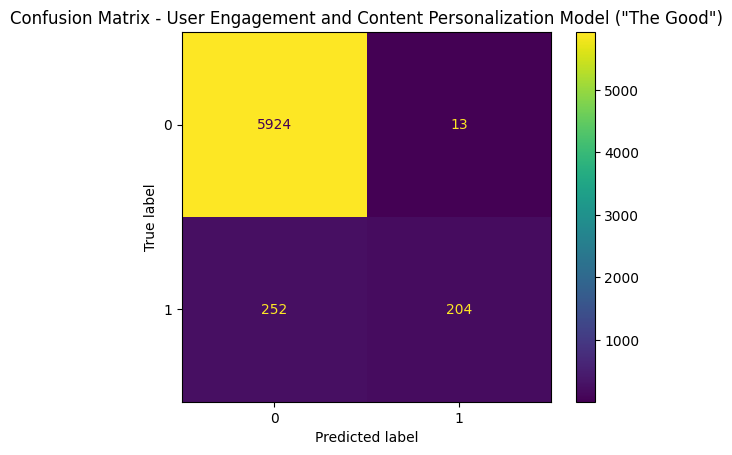

200/200 ━━━━━━━━━━━━━━━━━━━━ 7s 35ms/step


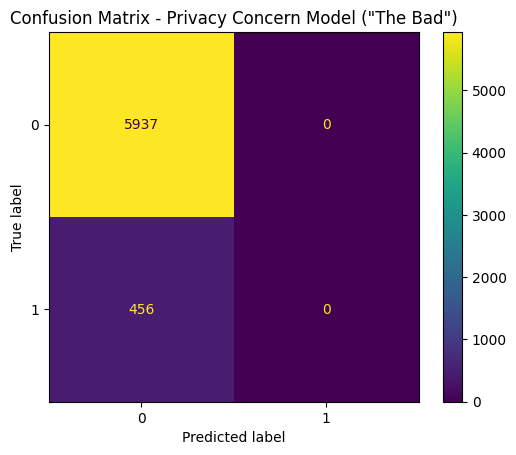

200/200 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step


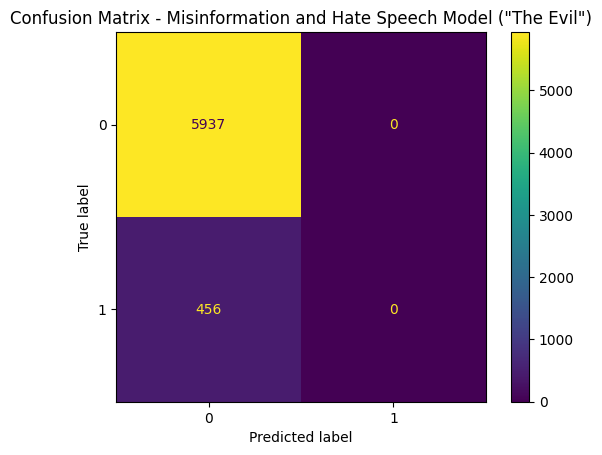

In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix for RandomForest (The Good)
cm_rf = confusion_matrix(y_test, y_pred)
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Confusion Matrix - User Engagement and Content Personalization Model ("The Good")')
plt.show()

# Confusion matrix for LSTM (The Bad)
y_pred_lstm = (model.predict(X_test_pad) > 0.5).astype("int32")
cm_lstm = confusion_matrix(y_test, y_pred_lstm)
disp_lstm = ConfusionMatrixDisplay(confusion_matrix=cm_lstm)
disp_lstm.plot()
plt.title('Confusion Matrix - Privacy Concern Model ("The Bad")')
plt.show()

# Confusion matrix for LSTM (The Evil)
y_pred_evil = (model.predict(X_test_padded) > 0.5).astype("int32")
cm_evil = confusion_matrix(y_test, y_pred_evil)
disp_evil = ConfusionMatrixDisplay(confusion_matrix=cm_evil)
disp_evil.plot()
plt.title('Confusion Matrix - Misinformation and Hate Speech Model ("The Evil")')
plt.show()


# ***5. Training and Evaluation***
5.1. User Engagement and Content Personalization Model ("The Good")

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize text data using TF-IDF
vectorizer = TfidfVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)  # Use the same vocabulary as the training data

# Define and train the RandomForest model using the vectorized data
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_vec, y_train)  # Fit the model on vectorized data

# Evaluate the model
y_pred = rf_model.predict(X_test_vec)  # Predict on vectorized test data
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')

Accuracy: 0.9585484123259815
F1 Score: 0.9515970757384073


5.2. Privacy Concern Model ("The Bad")

We'll use an LSTM model from the tensorflow and keras libraries for this model.

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Tokenize the text
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)
X_train_pad = pad_sequences(X_train_seq, maxlen=100)
X_test_pad = pad_sequences(X_test_seq, maxlen=100)

# Define the LSTM model
model = Sequential()
model.add(Embedding(input_dim=5000, output_dim=100, input_length=100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train_pad, y_train, epochs=5, batch_size=64, validation_data=(X_test_pad, y_test))

# Evaluate the model
score = model.evaluate(X_test_pad, y_test, verbose=0)
print(f'Accuracy: {score[1]}')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


400/400 ━━━━━━━━━━━━━━━━━━━━ 86s 203ms/step - accuracy: 0.9289 - loss: 0.2539 - val_accuracy: 0.9568 - val_loss: 0.1247
Epoch 2/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 83s 208ms/step - accuracy: 0.9634 - loss: 0.1028 - val_accuracy: 0.9585 - val_loss: 0.1285
Epoch 3/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 140s 204ms/step - accuracy: 0.9711 - loss: 0.0814 - val_accuracy: 0.9582 - val_loss: 0.1307
Epoch 4/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 83s 207ms/step - accuracy: 0.9778 - loss: 0.0647 - val_accuracy: 0.9592 - val_loss: 0.1314
Epoch 5/5
400/400 ━━━━━━━━━━━━━━━━━━━━ 142s 205ms/step - accuracy: 0.9830 - loss: 0.0529 - val_accuracy: 0.9576 - val_loss: 0.1432
Accuracy: 0.9576098918914795


5.3. Misinformation and Hate Speech Model ("The Evil")

In [37]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split


# Preparing data
X = data['tweet'].values
y = data['label'].values

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize and pad sequences
tokenizer = Tokenizer(num_words=5000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

max_length = 100
trunc_type='post'
padding_type='post'

X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

# Define LSTM model
def build_lstm_model():
    model = Sequential([
        Embedding(input_dim=5000, output_dim=128, input_length=max_length),
        SpatialDropout1D(0.2),
        LSTM(64, return_sequences=True),
        LSTM(32),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

model = build_lstm_model()

# Train the model
history = model.fit(X_train_padded, y_train, epochs=5, batch_size=32, validation_data=(X_test_padded, y_test))

# Evaluate the model
score = model.evaluate(X_test_padded, y_test, verbose=0)
print(f'Accuracy: {score[1]}')


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


800/800 ━━━━━━━━━━━━━━━━━━━━ 102s 121ms/step - accuracy: 0.9199 - loss: 0.2868 - val_accuracy: 0.9287 - val_loss: 0.2579
Epoch 2/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 142s 120ms/step - accuracy: 0.9296 - loss: 0.2620 - val_accuracy: 0.9287 - val_loss: 0.2580
Epoch 3/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 141s 120ms/step - accuracy: 0.9307 - loss: 0.2603 - val_accuracy: 0.9287 - val_loss: 0.2573
Epoch 4/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 96s 120ms/step - accuracy: 0.9295 - loss: 0.2618 - val_accuracy: 0.9287 - val_loss: 0.2583
Epoch 5/5
800/800 ━━━━━━━━━━━━━━━━━━━━ 95s 118ms/step - accuracy: 0.9292 - loss: 0.2621 - val_accuracy: 0.9287 - val_loss: 0.2571
Accuracy: 0.9286719560623169


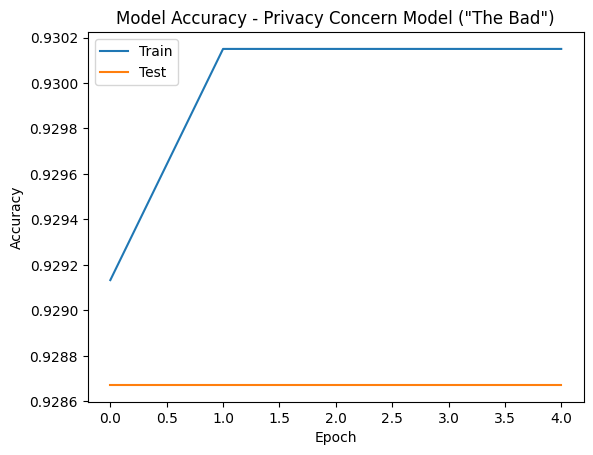

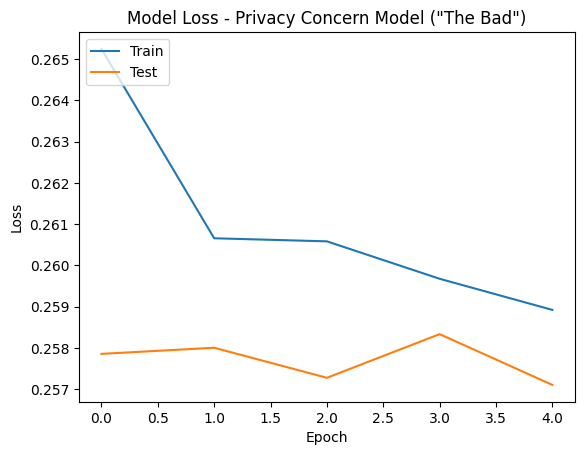

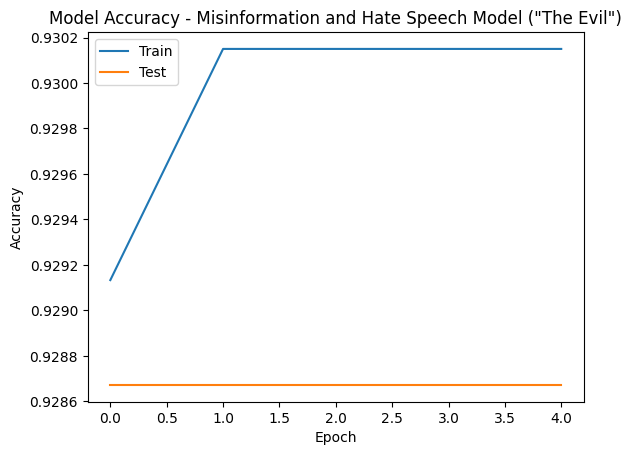

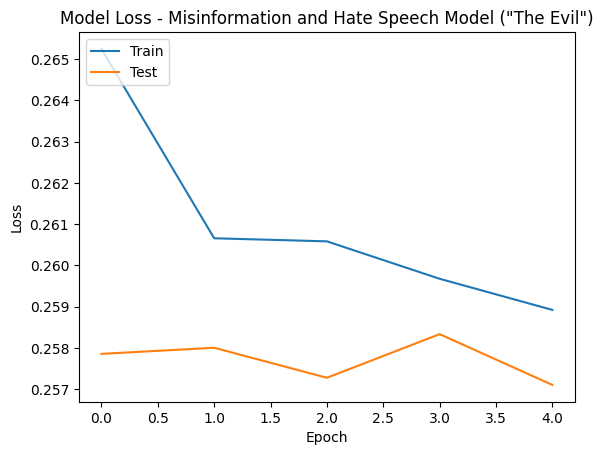

In [47]:
# Plot training & validation accuracy values for Privacy Concern Model ("The Bad")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - Privacy Concern Model ("The Bad")')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values for Privacy Concern Model ("The Bad")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - Privacy Concern Model ("The Bad")')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Repeat the same for the Misinformation and Hate Speech Model ("The Evil")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy - Misinformation and Hate Speech Model ("The Evil")')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss - Misinformation and Hate Speech Model ("The Evil")')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [38]:
# Print results for User Engagement and Content Personalization Model
print("User Engagement and Content Personalization Model (The Good):")
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(f'F1 Score: {f1_score(y_test, y_pred, average="weighted")}')
print("\n")

# Print results for Privacy Concern Model
print("Privacy Concern Model (The Bad):")
print(f'Accuracy: {score[1]}')
print("\n")

# Print results for Misinformation and Hate Speech Model
print("Misinformation and Hate Speech Model (The Evil):")
print(f'Accuracy: {score[1]}')
print("\n")


User Engagement and Content Personalization Model (The Good):
Accuracy: 0.9585484123259815
F1 Score: 0.9515970757384073


Privacy Concern Model (The Bad):
Accuracy: 0.9286719560623169


Misinformation and Hate Speech Model (The Evil):
Accuracy: 0.9286719560623169


